### **ML CLASSIFICATION**

In [3]:
# Load the datasets
train_data = pd.read_csv('cleaned_train_dataset.csv')
test_data = pd.read_csv('cleaned_test_dataset.csv')

# Display the column names
print("Train Data Columns:", train_data.columns.tolist())
print("Test Data Columns:", test_data.columns.tolist())


Train Data Columns: ['PL', 'PR', 'Sepsis']
Test Data Columns: ['Column1']


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_csv('cleaned_train_dataset.csv')
test_data = pd.read_csv('cleaned_test_dataset.csv')

# Print column names to verify
print("Train data columns:", train_data.columns)
print("Test data columns:", test_data.columns)

# Identify the target column (assuming it's the last column in train_data)
target_column = 'Sepsis'

# Separate features and target variable
X_train = train_data.drop([target_column], axis=1)
y_train = train_data[target_column]

# For test data, only separate features (assuming target is not present)
X_test = test_data

# Ensure X_test has the same columns as X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Gender']  # Add other categorical columns if present
for col in categorical_cols:
    if col in X_train.columns:
        X_train[col] = le.fit_transform(X_train[col])
    if col in X_test.columns:
        X_test[col] = le.transform(X_test[col])

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with correct column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Data preparation completed.")

# Verify the columns after scaling
print("Scaled train data columns:", X_train_scaled.columns)
print("Scaled test data columns:", X_test_scaled.columns)

Train data columns: Index(['PL', 'PR', 'Sepsis'], dtype='object')
Test data columns: Index(['Column1'], dtype='object')
Data preparation completed.
Scaled train data columns: Index(['PL', 'PR'], dtype='object')
Scaled test data columns: Index(['PL', 'PR'], dtype='object')


Logistic Regression Results:
Accuracy: 0.855

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



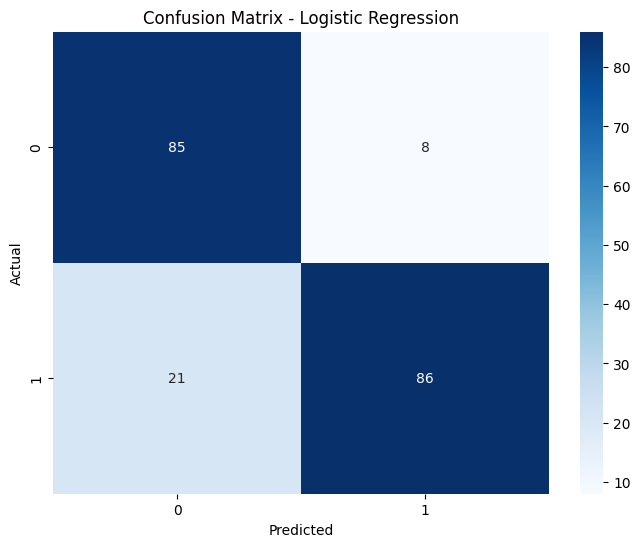

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Random Forest Results:
Accuracy: 0.9

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        93
           1       0.95      0.86      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



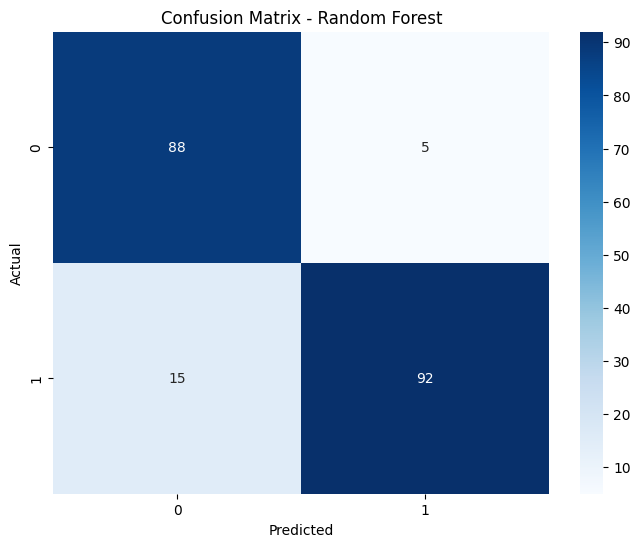

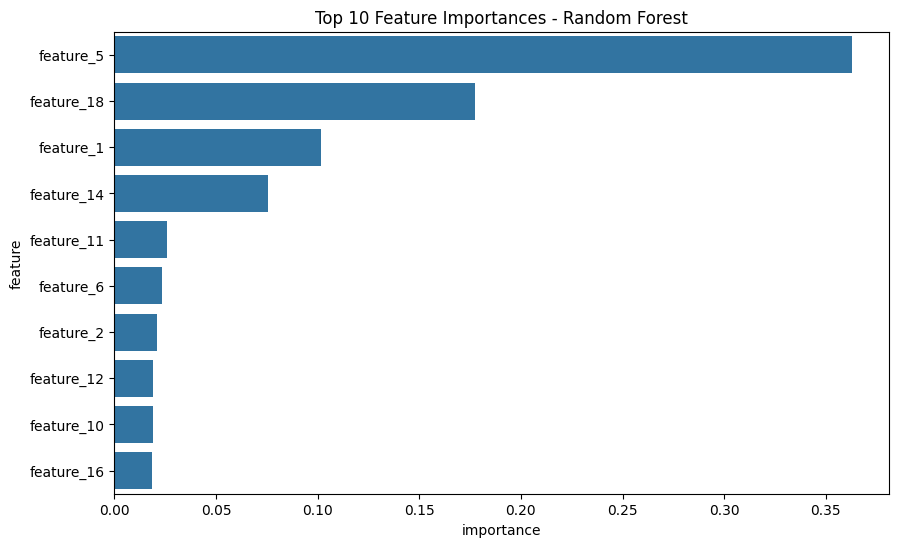

In [18]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature importance
# Generate feature names based on the number of features
n_features = X_train_scaled.shape[1]
feature_names = [f'feature_{i}' for i in range(n_features)]

feature_importance = pd.DataFrame({'feature': feature_names, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()


Gradient Boosting Results:
Accuracy: 0.915

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91        93
           1       0.97      0.87      0.92       107

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



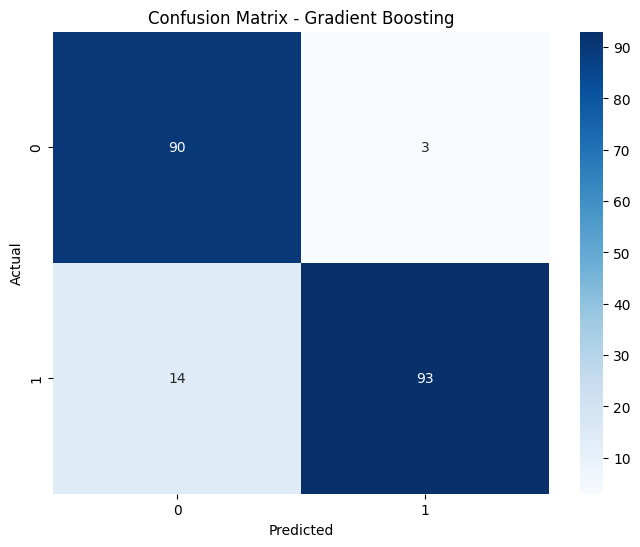

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
print("Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Support Vector Machine Results:
Accuracy: 0.845

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        93
           1       0.90      0.79      0.85       107

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



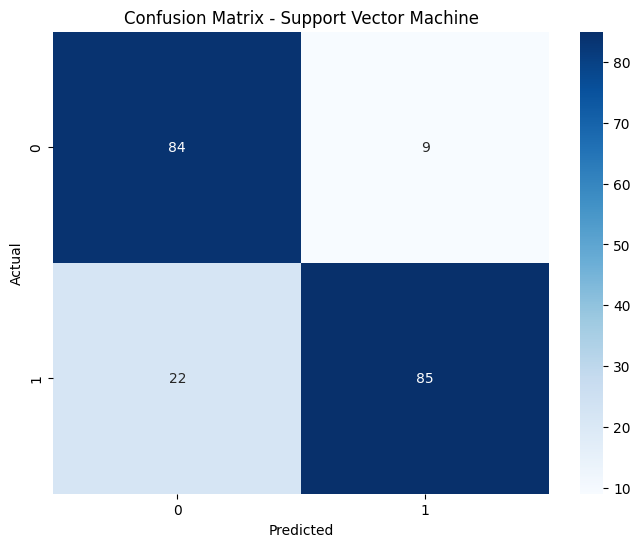

In [20]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Support Vector Machine Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Support Vector Machine')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
